In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline 
import matplotlib 
matplotlib.rcParams["figure.figsize"]=(20,20)



In [2]:
df1 = pd.read_csv("Pune house data.csv")
df1.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df2 = df1.drop(["area_type","availability","society","balcony"],axis="columns")
df2.head()


,size,total_sqft,bath,price,site_location
0,2 BHK,1056,2.0,39.07,Alandi Road
1,4 Bedroom,2600,5.0,120.00,Ambegaon Budruk
2,3 BHK,1440,2.0,62.00,Anandnagar
3,3 BHK,1521,3.0,95.00,Aundh
4,2 BHK,1200,2.0,51.00,Aundh Road


In [6]:
df2.isnull().sum()

size             16
total_sqft        0
bath             73
price             0
site_location     1
dtype: int64

In [7]:
df3=df2.dropna()

In [8]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
df3["bhk"]=df3["size"].apply(lambda x: int(x.split(" ")[0]))

C:\Users\Kunal\AppData\Local\Temp\ipykernel_10160\2023673167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["bhk"]=df3["size"].apply(lambda x: int(x.split(" ")[0]))


In [10]:
df3.head()

,size,total_sqft,bath,price,site_location,bhk
0,2 BHK,1056,2.0,39.07,Alandi Road,2
1,4 Bedroom,2600,5.0,120.00,Ambegaon Budruk,4
2,3 BHK,1440,2.0,62.00,Anandnagar,3
3,3 BHK,1521,3.0,95.00,Aundh,3
4,2 BHK,1200,2.0,51.00,Aundh Road,2


In [11]:
df3.drop(["size"], axis = "columns")

,total_sqft,bath,price,site_location,bhk
0,1056,2.0,39.07,Alandi Road,2
1,2600,5.0,120.00,Ambegaon Budruk,4
2,1440,2.0,62.00,Anandnagar,3
3,1521,3.0,95.00,Aundh,3
4,1200,2.0,51.00,Aundh Road,2
...,...,...,...,...,...
13315,3453,4.0,231.00,Pashan,5
13316,3600,5.0,400.00,Paud Road,4
13317,1141,2.0,60.00,Pirangut,2
13318,4689,4.0,488.00,Prabhat Road,4


In [12]:
df3["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [13]:
df3["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2067,), dtype=object)

In [14]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
    

In [15]:
df3[~df3["total_sqft"].apply(is_float)].head(20)


,size,total_sqft,bath,price,site_location,bhk
30,4 BHK,2100 - 2850,4.0,186.000,Gultekdi,4
122,4 BHK,3067 - 8156,4.0,477.000,Ganeshkhind,4
137,2 BHK,1042 - 1105,2.0,54.005,Khadaki,2
165,2 BHK,1145 - 1340,2.0,43.490,Prabhat Road,2
188,2 BHK,1015 - 1540,2.0,56.800,Wakadewadi,2
410,1 BHK,34.46Sq. Meter,1.0,18.500,Ganeshkhind,1
549,2 BHK,1195 - 1440,2.0,63.770,Prabhat Road,2
648,9 Bedroom,4125Perch,9.0,265.000,Raviwar Peth,9
661,2 BHK,1120 - 1145,2.0,48.130,Tilak Road,2
672,4 Bedroom,3090 - 5002,4.0,445.000,Alandi Road,4


In [16]:
def convert_sqft_to_num(x):
    token=x.split("-")
    if len(token)==2:
        return(float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except : 
        return None
    

In [17]:
convert_sqft_to_num("24-3434")


1729.0

In [18]:
df4 = df3.copy()
df4.total_sqft= df4["total_sqft"].apply(convert_sqft_to_num)
df4.head()

,size,total_sqft,bath,price,site_location,bhk
0,2 BHK,1056.0,2.0,39.07,Alandi Road,2
1,4 Bedroom,2600.0,5.0,120.00,Ambegaon Budruk,4
2,3 BHK,1440.0,2.0,62.00,Anandnagar,3
3,3 BHK,1521.0,3.0,95.00,Aundh,3
4,2 BHK,1200.0,2.0,51.00,Aundh Road,2


In [19]:
df5 = df4.copy()
df5["price_per_sqft"]= df5["price"]*100000/df5["total_sqft"]
df5.head()

,size,total_sqft,bath,price,site_location,bhk,price_per_sqft
0,2 BHK,1056.0,2.0,39.07,Alandi Road,2,3699.810606
1,4 Bedroom,2600.0,5.0,120.00,Ambegaon Budruk,4,4615.384615
2,3 BHK,1440.0,2.0,62.00,Anandnagar,3,4305.555556
3,3 BHK,1521.0,3.0,95.00,Aundh,3,6245.890861
4,2 BHK,1200.0,2.0,51.00,Aundh Road,2,4250.000000


In [20]:
df5.site_location.unique()

array(['Alandi Road', 'Ambegaon Budruk', 'Anandnagar', 'Aundh',
       'Aundh Road', 'Balaji Nagar', 'Baner', 'Baner road',
       'Bhandarkar Road', 'Bhavani Peth', 'Bibvewadi', 'Bopodi',
       'Budhwar Peth', 'Bund Garden Road', 'Camp', 'Chandan Nagar',
       'Dapodi', 'Deccan Gymkhana', 'Dehu Road', 'Dhankawadi',
       'Dhayari Phata', 'Dhole Patil Road', 'Erandwane', 'Fatima Nagar',
       'Fergusson College Road', 'Ganesh Peth', 'Ganeshkhind',
       'Ghorpade Peth', 'other', 'Gokhale Nagar', 'Gultekdi',
       'Guruwar peth', 'Hadapsar', 'Hadapsar Industrial Estate',
       'Hingne Khurd', 'Jangali Maharaj Road', 'Kalyani Nagar',
       'Karve Nagar', 'Karve Road', 'Kasba Peth', 'Katraj', 'Khadaki',
       'Khadki', 'Kharadi', 'Kondhwa', 'Kondhwa Budruk', 'Kondhwa Khurd',
       'Koregaon Park', 'Kothrud', 'Law College Road', 'Laxmi Road',
       'Lulla Nagar', 'Mahatma Gandhi Road', 'Mangalwar peth',
       'Manik Bagh', 'Market yard', 'Mukund Nagar', 'Mundhawa',
       'Naga

In [21]:
len(df5.site_location.unique())

97

In [22]:
df5.site_location = df5.site_location.apply(lambda x: x.strip())
location_stats = df5.groupby("site_location")["site_location"].agg("count").sort_values(ascending=False)
location_stats

site_location
Alandi Road        139
Ambegaon Budruk    139
Aundh Road         139
Baner road         139
Bibvewadi          139
                  ... 
Shukrawar Peth     136
Yerawada           136
Wanowrie           136
Vadgaon Budruk     134
other                1
Name: site_location, Length: 97, dtype: int64

In [23]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

site_location
other    1
Name: site_location, dtype: int64

In [24]:
df5.location = df5.site_location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.site_location.unique())

C:\Users\Kunal\AppData\Local\Temp\ipykernel_10160\2299168407.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df5.location = df5.site_location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)


97

In [25]:
df5.head()

,size,total_sqft,bath,price,site_location,bhk,price_per_sqft
0,2 BHK,1056.0,2.0,39.07,Alandi Road,2,3699.810606
1,4 Bedroom,2600.0,5.0,120.00,Ambegaon Budruk,4,4615.384615
2,3 BHK,1440.0,2.0,62.00,Anandnagar,3,4305.555556
3,3 BHK,1521.0,3.0,95.00,Aundh,3,6245.890861
4,2 BHK,1200.0,2.0,51.00,Aundh Road,2,4250.000000


In [26]:
df5[df5.total_sqft/df5.bhk<300].head()

,size,total_sqft,bath,price,site_location,bhk,price_per_sqft
9,6 Bedroom,1020.0,6.0,370.0,Bhavani Peth,6,36274.509804
45,8 Bedroom,600.0,9.0,200.0,Kondhwa Budruk,8,33333.333333
58,6 Bedroom,1407.0,4.0,150.0,Mundhawa,6,10660.980810
68,8 Bedroom,1350.0,7.0,85.0,Pirangut,8,6296.296296
70,3 Bedroom,500.0,3.0,100.0,Pune Railway Station,3,20000.000000


In [27]:
df5.shape

(13246, 7)

In [28]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 7)

In [29]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.628922
std        4168.075333
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [30]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('site_location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10883, 7)

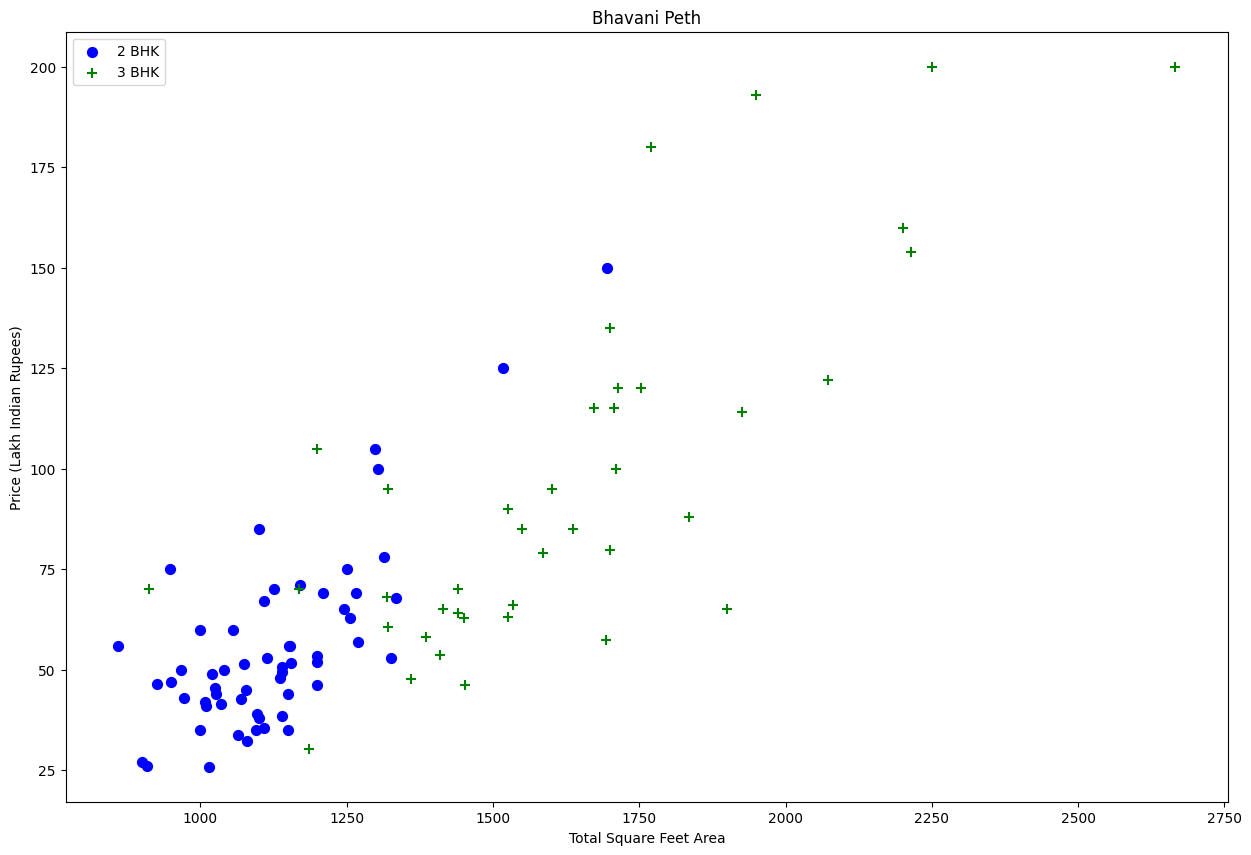

In [31]:
def plot_scatter_chart(df,site_location):
    bhk2 = df[(df.site_location==site_location) & (df.bhk==2)]
    bhk3 = df[(df.site_location==site_location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(site_location)
    plt.legend()
    
plot_scatter_chart(df7,"Bhavani Peth")

In [32]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for site_location, site_location_df in df.groupby('site_location'):
        bhk_stats = {}
        for bhk, bhk_df in site_location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in site_location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7543, 7)

In [33]:
df8.bath.unique()

array([ 2.,  4.,  3.,  5.,  9.,  1.,  6.,  7.,  8., 12., 13., 16.])

Text(0, 0.5, 'Count')

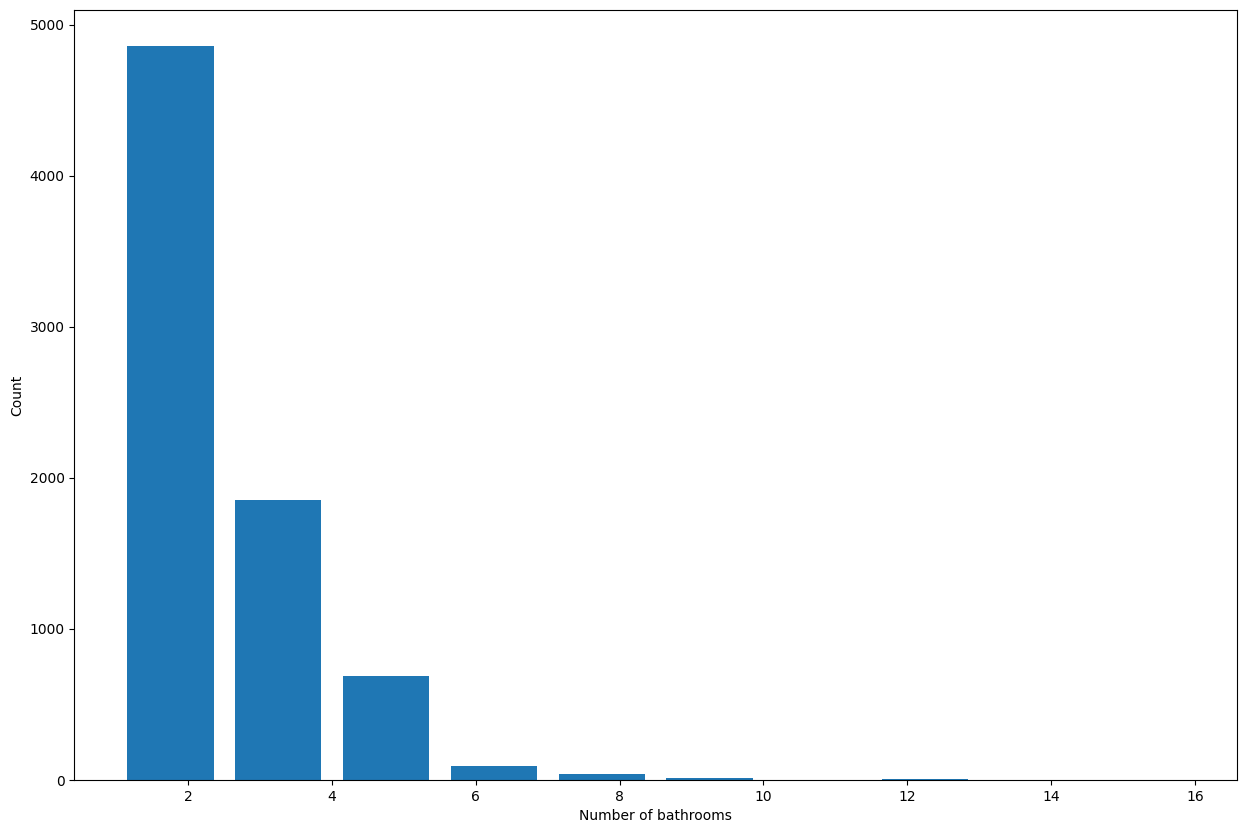

In [34]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [35]:
df8[df8.bath>df8.bhk+2]

,size,total_sqft,bath,price,site_location,bhk,price_per_sqft
772,3 BHK,1806.0,6.0,116.0,Baner,3,6423.034330
3067,6 BHK,11338.0,9.0,1000.0,Ghorpade Peth,6,8819.897689
4231,4 Bedroom,7000.0,8.0,450.0,Karve Nagar,4,6428.571429


In [36]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7479, 7)

In [37]:
df9.head()

,size,total_sqft,bath,price,site_location,bhk,price_per_sqft
0,2 BHK,1056.0,2.0,39.07,Alandi Road,2,3699.810606
1,4 Bedroom,2894.0,4.0,245.00,Alandi Road,4,8465.791292
2,2 BHK,1084.0,2.0,50.00,Alandi Road,2,4612.546125
3,2 BHK,1230.0,2.0,80.00,Alandi Road,2,6504.065041
4,3 BHK,1750.0,3.0,130.00,Alandi Road,3,7428.571429


In [38]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,total_sqft,bath,price,site_location,bhk
0,1056.0,2.0,39.07,Alandi Road,2
1,2894.0,4.0,245.00,Alandi Road,4
2,1084.0,2.0,50.00,Alandi Road,2


In [39]:

dummies = pd.get_dummies(df10.site_location)
dummies.head(3)

,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,Baner road,Bhandarkar Road,Bhavani Peth,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [40]:
df11 = pd.concat([df10,dummies],axis='columns')
df11.head()

,total_sqft,bath,price,site_location,bhk,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1056.0,2.0,39.07,Alandi Road,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2894.0,4.0,245.00,Alandi Road,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1084.0,2.0,50.00,Alandi Road,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1230.0,2.0,80.00,Alandi Road,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1750.0,3.0,130.00,Alandi Road,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [41]:
df12 = df11.drop('site_location',axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1056.0,2.0,39.07,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2894.0,4.0,245.00,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [42]:
df12.shape

(7479, 100)

In [43]:
X = df12.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1056.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2894.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1084.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [44]:
y = df12.price;
y.head()

0     39.07
1    245.00
2     50.00
3     80.00
4    130.00
Name: price, dtype: float64

In [45]:
len(y)

7479

In [46]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [48]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8234642712561868

In [49]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.87729294, 0.87158074, 0.82825079, 0.89763339, 0.81068616])

In [50]:
def predict_price( site_location,sqft,bath,bhk):    
    loc_index = np.where(X.columns== site_location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    
    x_df = pd.DataFrame([x], columns=X.columns) 
    return float(lr_clf.predict(x_df)[0])
    

In [51]:
predict_price('Alandi Road',1000, 2, 2)

52.658446119689714

In [52]:
predict_price('Baner road',3000, 4, 4)

202.546715123246

In [53]:
predict_price('Kothrud',3000, 4, 4)

207.5150449532938

In [59]:
predict_price('Baner road',4500, 4, 4)


309.13106095061937

In [57]:
import pickle
with open('pune_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [58]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))